Compare the observables (_e.g._ $P_\ell$ and the 3PCF) of the halo catalog with different $\sum m_\nu$

In [1]:
import numpy as np
# -- eMaNu--
from emanu import util as UT
from emanu import obvs as Obvs

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as pl 
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [7]:
def Pellk(ell, mneut, nzbin=4, zspace=False): 
    pks = [] 
    for i in range(1,101): 
        plk_i = Obvs.Plk_halo(mneut, i, nzbin, zspace=zspace)
        pks.append(plk_i['p'+str(ell)+'k']) 
    return plk_i['k'], np.array(pks)

Text(0,0.5,'$P_\\mathrm{halo}(k)$')

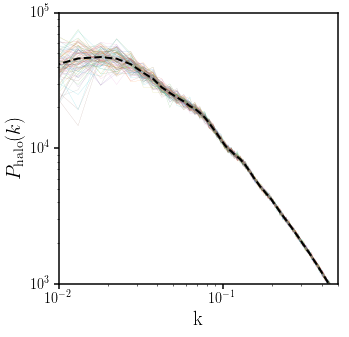

In [11]:
fig = plt.figure(figsize=(5,5))
sub = fig.add_subplot(111)
k, plks = Pellk(0, 0.0)
for i in range(plks.shape[0]):
    sub.plot(k, plks[i], lw=0.1)
sub.plot(k, np.average(plks, axis=0), c='k', ls='--', lw=2)
sub.set_xlim([0.01, 0.5])
sub.set_xscale('log')
sub.set_xlabel('k', fontsize=20)
sub.set_ylim([1e3, 1e5])
sub.set_yscale('log')
sub.set_ylabel('$P_\mathrm{halo}(k)$', fontsize=20)

(0.95, 1.5)

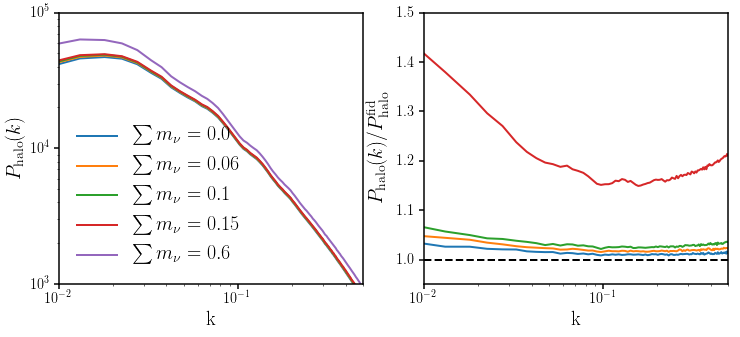

In [23]:
fig = plt.figure(figsize=(12,5))
sub = fig.add_subplot(121)
for mneut in [0.0, 0.06, 0.1, 0.15, 0.6]:
    k, plks = Pellk(0, mneut)
    sub.plot(k, np.average(plks, axis=0), lw=2, label=r'$\sum m_\nu ='+str(mneut)+'$')
sub.legend(loc='lower left', fontsize=20)
sub.set_xlim([0.01, 0.5])
sub.set_xscale('log')
sub.set_xlabel('k', fontsize=20)
sub.set_ylim([1e3, 1e5])
sub.set_yscale('log')
sub.set_ylabel('$P_\mathrm{halo}(k)$', fontsize=20)

sub = fig.add_subplot(122)
_, plk_fid = Pellk(0, 0.0)
for mneut in [0.06, 0.1, 0.15, 0.6]:
    k, plks = Pellk(0, mneut)
    sub.plot(k, np.average(plks, axis=0)/np.average(plk_fid, axis=0), lw=2)
sub.plot([1e-2, 1.], [1., 1.], c='k', ls='--', lw=2)
sub.set_xlabel('k', fontsize=20)
sub.set_xlim([0.01, 0.5])
sub.set_xscale('log')
sub.set_ylabel('$P_\mathrm{halo}(k)/P_\mathrm{halo}^\mathrm{fid}$', fontsize=20)
sub.set_ylim([0.95, 1.5])